In [77]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
%load_ext autoreload
%autoreload 2

from settings import *
from url_helpers import analyze_url
from sklearn.metrics import cohen_kappa_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
figures = conf['aux_dir']+'figure-eight/'
trust_thr = 0.5

In [79]:
df = pd.read_csv(figures+'tobacco-crowd.csv').rename(columns={'how_do_you_rate_the_scientific_quality_of_this_article': 'crowd (w/o indicators)'})
df = df[df._trust > trust_thr][['article', 'crowd (w/o indicators)']]
df.article = df.article.apply(lambda x: x.replace('https://', 'http://'))
print(df.shape)
df_crowd = df.groupby('article').mean()

(65, 2)


In [80]:
df = pd.read_csv(figures+'tobacco-crowd-ind.csv').rename(columns={'how_do_you_rate_the_scientific_quality_of_this_article': 'crowd (w/ indicators)'})
df = df[df._trust > trust_thr][['article', 'crowd (w/ indicators)']]
df.article = df.article.apply(lambda x: x.replace('https://', 'http://'))
print(df.shape)
df_crowd_ind = df.groupby('article').mean()

(65, 2)


In [86]:
df1 = pd.read_csv(figures+'tobacco-Andreu.csv').rename(columns={'how_do_you_rate_the_scientific_quality_of_this_article': 'expert'})
df2 = pd.read_csv(figures+'tobacco-Aina.csv').rename(columns={'how_do_you_rate_the_scientific_quality_of_this_article': 'expert'})

print(cohen_kappa_score(df1.sort_values(by='article')['expert'], df2.sort_values(by='article')['expert']))
df = pd.concat([df2])
df = df[df._trust > trust_thr][['article', 'expert']]
df.article = df.article.apply(lambda x: x.replace('https://', 'http://'))
df_exp = df.groupby('article').mean()

0.003558718861210064


In [87]:
df = df_crowd.join(df_exp).join(df_crowd_ind).reset_index()

In [88]:
#df = df.drop([5, 6, 15])

In [89]:
df.corr()

,crowd (w/o indicators),expert,crowd (w/ indicators)
crowd (w/o indicators),1.000000,0.143138,0.604166
expert,0.143138,1.000000,0.429841
crowd (w/ indicators),0.604166,0.429841,1.000000


In [90]:
l = df['article'].apply(lambda x: analyze_url(x)[0]).tolist()
df['article'] = [v + ' (' + str(l[:i].count(v) + 1) + ')' if l.count(v) > 1 else v for i, v in enumerate(l)]
df = pd.melt(df, id_vars=['article'], var_name='Rated by', value_name='Quality').rename(columns={'article': 'Outlet'})
df['Quality'] = df['Quality'] + 2

In [91]:
df = df.sort_values(by=['Rated by', 'Quality'], ascending=[False,True])

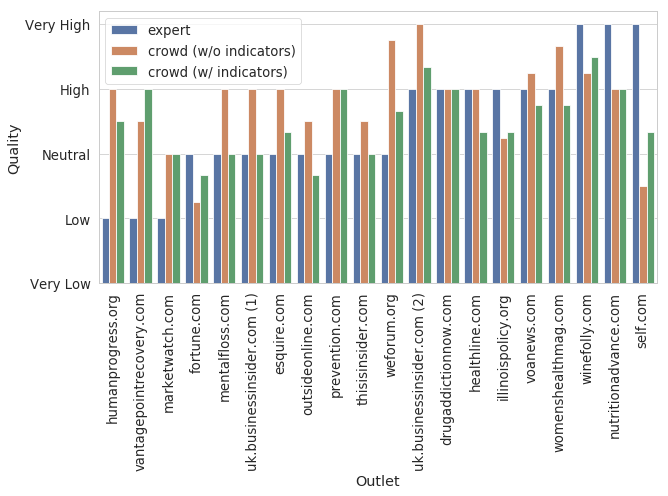

In [92]:
sns.set(context='paper', style='whitegrid', color_codes=True, font_scale=1.5)
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(hue='Rated by', y='Quality', x='Outlet', data=df, ax=ax)
ax.set_yticks(ticks=[0, 1, 2, 3, 4])
ax.set_yticklabels(['Very Low', 'Low', 'Neutral', 'High', 'Very High'])
plt.xticks(rotation=90)
plt.legend(loc='upper left')
fig.savefig(figures+'a-t-c.pdf', bbox_inches='tight')